In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from surprise import Reader, Dataset

%matplotlib inline

In [2]:
links_df = pd.read_csv('Data/links.csv')
movies_df = pd.read_csv('Data/movies.csv')
ratings_df = pd.read_csv('Data/ratings.csv')
tags_df = pd.read_csv('Data/tags.csv')

In [3]:
links_df.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [50]:
(tags_df['tag'].unique())

array(['funny', 'Highly quotable', 'will ferrell', ..., 'gun fu',
       'heroic bloodshed', 'Heroic Bloodshed'], dtype=object)

In [5]:
movies_df.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [6]:
ratings_df.head(2)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247


tags_df.head(20)

In [7]:
df_user = ratings_df.drop('timestamp',axis = 1)

In [8]:
df_user

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
100831,610,166534,4.0
100832,610,168248,5.0
100833,610,168250,5.0
100834,610,168252,5.0


In [9]:
df_user.isna().sum()

userId     0
movieId    0
rating     0
dtype: int64

In [10]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [11]:
tags_df.isna().sum()

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

In [12]:
tags_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


In [13]:
movies_df.isna().sum()

movieId    0
title      0
genres     0
dtype: int64

In [14]:
links_df.isna().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [15]:
df_movies = pd.merge(df_user,movies_df,on='movieId')

In [16]:
df_movies.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [17]:
df_movies.head(20)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [18]:
df_movies.groupby(by = 'userId')['title'].count()

userId
1       232
2        29
3        39
4       216
5        44
       ... 
606    1115
607     187
608     831
609      37
610    1302
Name: title, Length: 610, dtype: int64

In [19]:
df_movies.sort_values(by= "userId")

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
12117,1,2389,2.0,Psycho (1998),Crime|Horror|Thriller
12126,1,2395,5.0,Rushmore (1998),Comedy|Drama
12182,1,2406,4.0,Romancing the Stone (1984),Action|Adventure|Comedy|Romance
776,1,70,3.0,From Dusk Till Dawn (1996),Action|Comedy|Horror|Thriller
...,...,...,...,...,...
84152,610,51709,5.0,"Host, The (Gwoemul) (2006)",Comedy|Drama|Horror|Sci-Fi|Thriller
26937,610,589,5.0,Terminator 2: Judgment Day (1991),Action|Sci-Fi
69808,610,66097,4.0,Coraline (2009),Animation|Fantasy|Thriller
69820,610,71464,4.0,"Serious Man, A (2009)",Comedy|Drama


In [20]:
df_movies['rating'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [21]:
title_count = df_movies.groupby(by = 'title')['userId'].count().sort_values(ascending = False)

In [22]:
title_count

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
                                            ... 
King Solomon's Mines (1950)                    1
King Solomon's Mines (1937)                    1
King Ralph (1991)                              1
King Kong Lives (1986)                         1
À nous la liberté (Freedom for Us) (1931)      1
Name: userId, Length: 9719, dtype: int64

In [23]:
title_count.head()

title
Forrest Gump (1994)                 329
Shawshank Redemption, The (1994)    317
Pulp Fiction (1994)                 307
Silence of the Lambs, The (1991)    279
Matrix, The (1999)                  278
Name: userId, dtype: int64

In [24]:
title_count.describe()

count    9719.000000
mean       10.375141
std        22.406220
min         1.000000
25%         1.000000
50%         3.000000
75%         9.000000
max       329.000000
Name: userId, dtype: float64

In [25]:
len(title_count.index.unique())

9719

In [26]:
zz = []
title_count.head()

for x,y in title_count.items():
    if y>1 and x not in zz:
        zz.append(x)

In [27]:
len(zz)

6278

(-0.5, 9718.5, 0.0, 345.45)

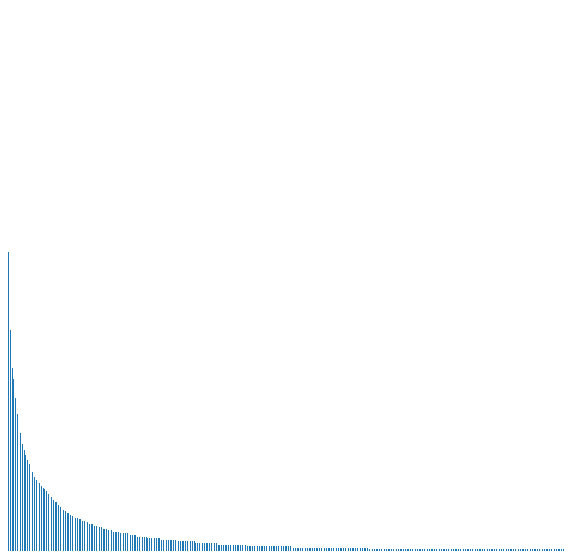

In [28]:
fig, ax = plt.subplots(figsize = (10,10))
#ax.set_xlabel('Number of Viewers',size = 15)
#ax.set_ylabel('Movie',size = 10)
#ax.set_title('Top 15 Movie User Views',size = 20)
title_count.plot(kind = 'bar')
plt.axis('off')


In [29]:
#title_count.head(200).plot(kind = 'bar')

In [30]:
#title_count.tail(60).plot(kind = 'bar')

In [31]:
df_t = df_movies.drop(['title','genres'],axis = 1)

In [32]:

data = Dataset.load_from_df(df_t,Reader())


In [33]:
data

In [34]:
movie_df2 = movies_df.copy()

In [35]:
movie_df2.head(2)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [36]:
movie_df2['genres'] = movie_df2['genres'].str.strip().str.split('|')

In [37]:
genres_df = movie_df2.explode('genres')

In [38]:
genres_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [39]:
genres_df.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
1,2,Jumanji (1995),Adventure
1,2,Jumanji (1995),Children
1,2,Jumanji (1995),Fantasy
2,3,Grumpier Old Men (1995),Comedy
2,3,Grumpier Old Men (1995),Romance


In [40]:
len(genres_df['genres'].unique())

20

In [41]:
genres_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


In [42]:
genres_df.groupby(['genres'])['movieId'].count()

genres
(no genres listed)      34
Action                1828
Adventure             1263
Animation              611
Children               664
Comedy                3756
Crime                 1199
Documentary            440
Drama                 4361
Fantasy                779
Film-Noir               87
Horror                 978
IMAX                   158
Musical                334
Mystery                573
Romance               1596
Sci-Fi                 980
Thriller              1894
War                    382
Western                167
Name: movieId, dtype: int64

In [43]:
az = genres_df.groupby('genres')

In [44]:
az.get_group('(no genres listed)')

,movieId,title,genres
8517,114335,La cravate (1957),(no genres listed)
8684,122888,Ben-hur (2016),(no genres listed)
8687,122896,Pirates of the Caribbean: Dead Men Tell No Tal...,(no genres listed)
8782,129250,Superfast! (2015),(no genres listed)
8836,132084,Let It Be Me (1995),(no genres listed)
8902,134861,Trevor Noah: African American (2013),(no genres listed)
9033,141131,Guardians (2016),(no genres listed)
9053,141866,Green Room (2015),(no genres listed)
9070,142456,The Brand New Testament (2015),(no genres listed)
9091,143410,Hyena Road,(no genres listed)


In [45]:
genres_df['genres'].values

array(['Adventure', 'Animation', 'Children', ..., 'Action', 'Animation',
       'Comedy'], dtype=object)

<BarContainer object of 20 artists>

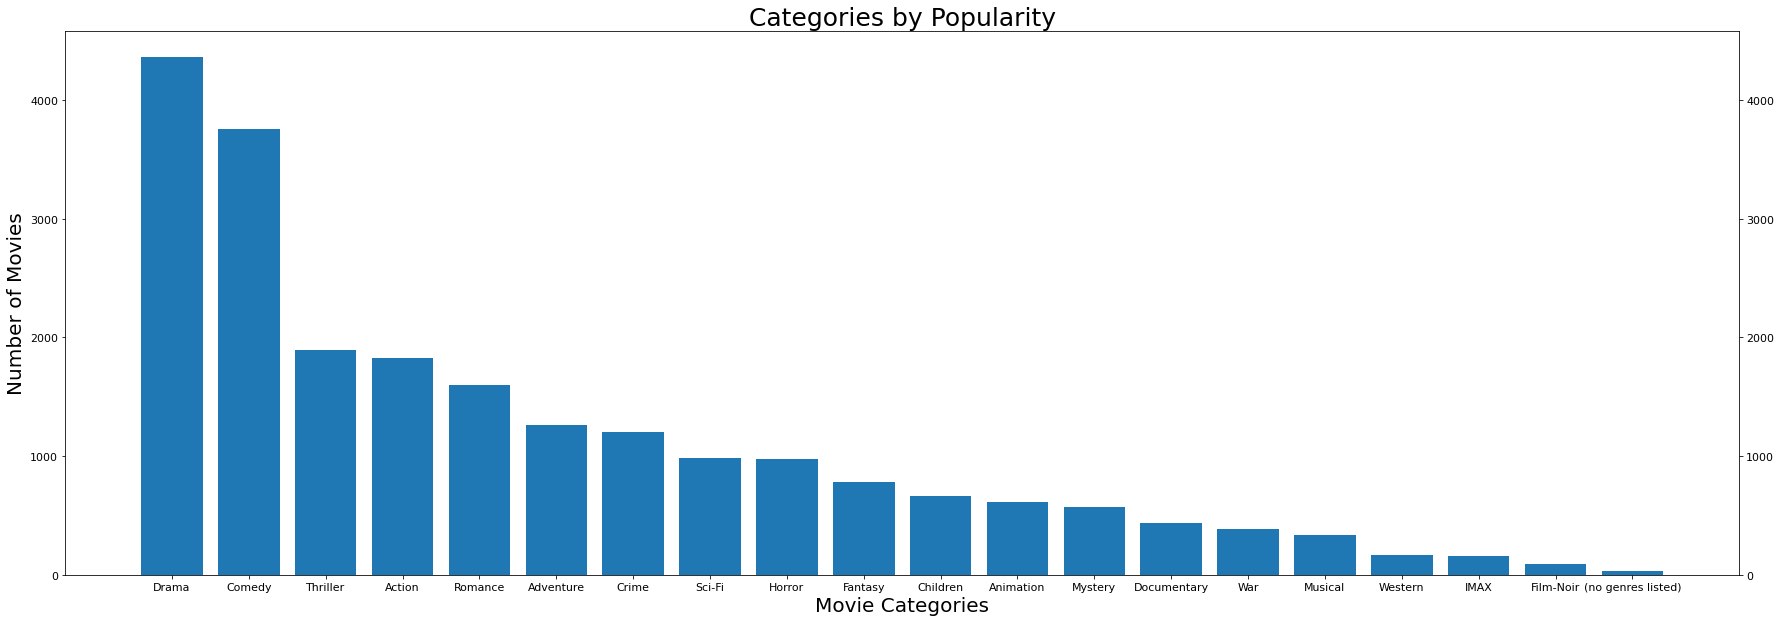

In [46]:
#initiate graph 
fig, ax = plt.subplots(figsize = (30,10))


#set the x and y parameters
x = genres_df.groupby('genres')['movieId'].count().sort_values(ascending = False).index
height = genres_df.groupby('genres')['movieId'].count().sort_values(ascending = False)

#set axes labels
ax.set_xlabel('Movie Categories',size = 20)
ax.set_ylabel('Number of Movies',size = 20)
ax.set_title('Categories by Popularity',size = 25)

#display y-yabel and ticks on both left and right side
plt.tick_params(labelright = True)
ax.yaxis.set_ticks_position('both')

#set the tick sizes for graph
plt.yticks(size = 11)
plt.xticks(rotation = 0, size = 11)

#plit the bar graph of categories vs movies
ax.bar(x,height)